In [1]:
#Import Libraries
import numpy as np 
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns 
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split  
from sklearn.model_selection import KFold  
from sklearn.model_selection import GridSearchCV 
from sklearn.ensemble import RandomForestClassifier  
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm  
from sklearn import metrics

In [3]:
#Import Data
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'

# The column names are not included in the data file, so we define them manually
column_names = ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst']
data = pd.read_csv(url, header=None, names=column_names)

In [4]:
#Look at the data
print(data.head(5))

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
#Data Visualization
#Diagnosis is the class label(y), M for Malignant, B for Benign
#x is all other features except diagnosis

y=data['diagnosis']
list = ['id','diagnosis']
x = data.drop(list,axis = 1 )
x.head()


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Number of Malignant: 212
Number of Benign: 357


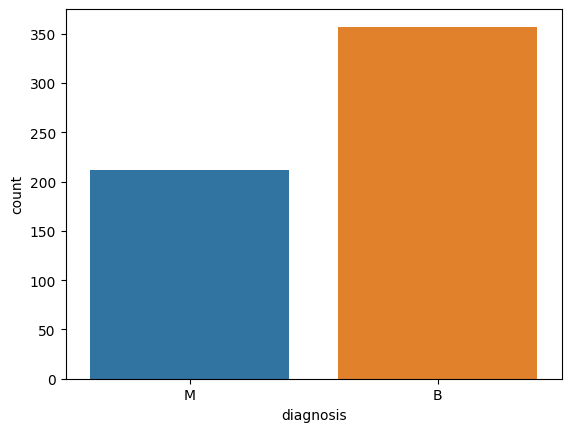

In [7]:
#Count ratio between Malignant tumors and Benign tumors is close to 0.6, about equally represented.
sns.countplot(x=y,label="Count")      
B, M = y.value_counts(sort=True)
print('Number of Malignant:',M)
print('Number of Benign:',B)
 



In [8]:
#Feature Selection
#Check for NaN values
x.isnull().values.any()
y.isnull().values.any()

False

In [9]:
x.describe() # From this table, we can see that the values are not on the same scale, eg: radius_mean and compactness_mean
#We need to perform Standardization 

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [10]:
#Standardization
data = x
data_normal = (data - data.mean()) / (data.std()) 

In [11]:
#Violin Plot Visualization
# Split data into 3 sets: Mean, Standard Error(SE) and Worst
def violin_plot(beginning,end):
    data = pd.concat([y,data_normal.iloc[:,beginning:end]],axis=1)
    data = pd.melt(data, id_vars="diagnosis", var_name="features", value_name='value')
    plt.figure(figsize=(10,10))
    sns.violinplot(x="features", y="value", hue="diagnosis", data=data, split=True, inner="quart")
    plt.xticks(rotation=45)

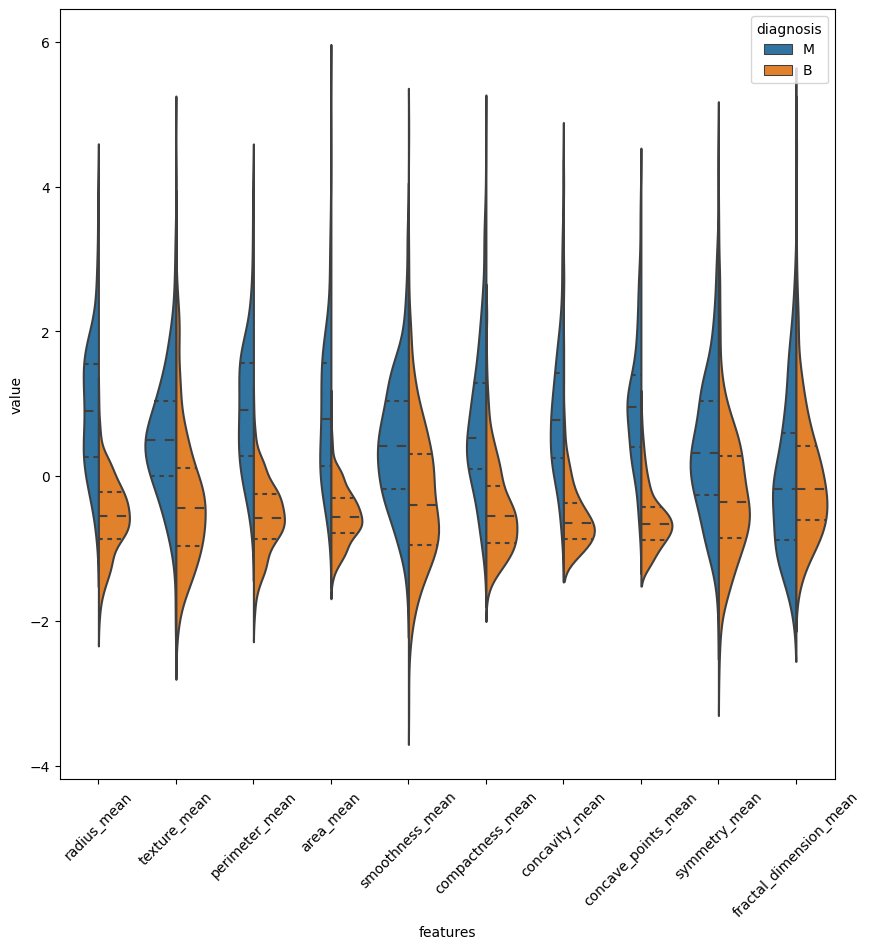

In [12]:
#25th percentile, Median and the 75th percentile
# first ten features
violin_plot(0,10) # Radius_mean, Perimeter_mean, Area_mean, Compactness_mean, Concavity_mean, Concave_points_mean are well separated between Malignant and Benign tumors, 
# as the 75 percentile of Benign tumors is below the 25 percentile of Malignant tumors. These 6 features would be good candidates for the classification.
# fractal_dimension_mean has the almost the same median for both tumor types so it is not good for classification.
#radius_mean, perimeter_mean and area_mean looks similar and might be correlated.

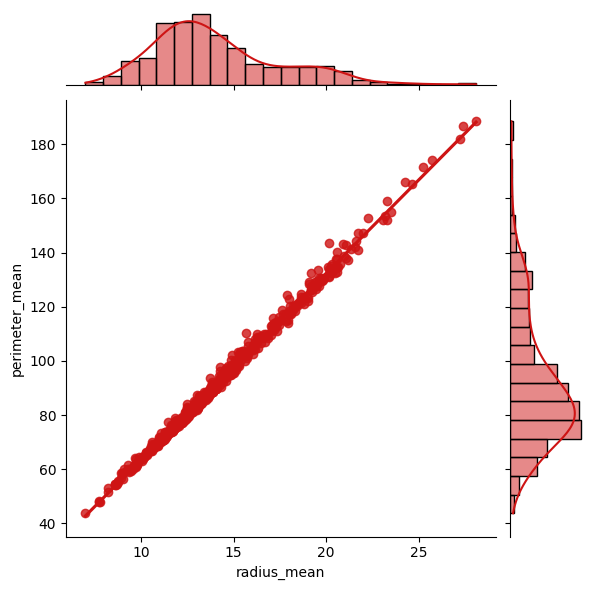

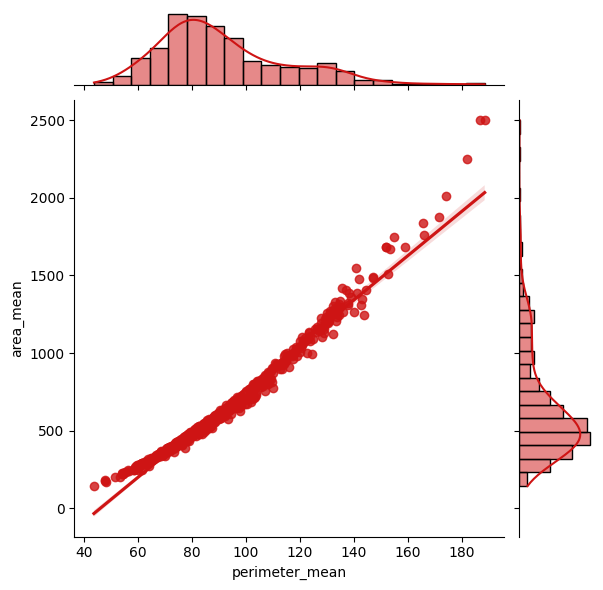

In [13]:
#check for correlation
def joint_plot(feature1, feature2):
    sns.jointplot(data=data,x=x.loc[:,feature1], y=x.loc[:,feature2], kind="reg", color="#ce1414")

joint_plot("radius_mean","perimeter_mean")
joint_plot("perimeter_mean","area_mean")
#strong correlation, linear relationship


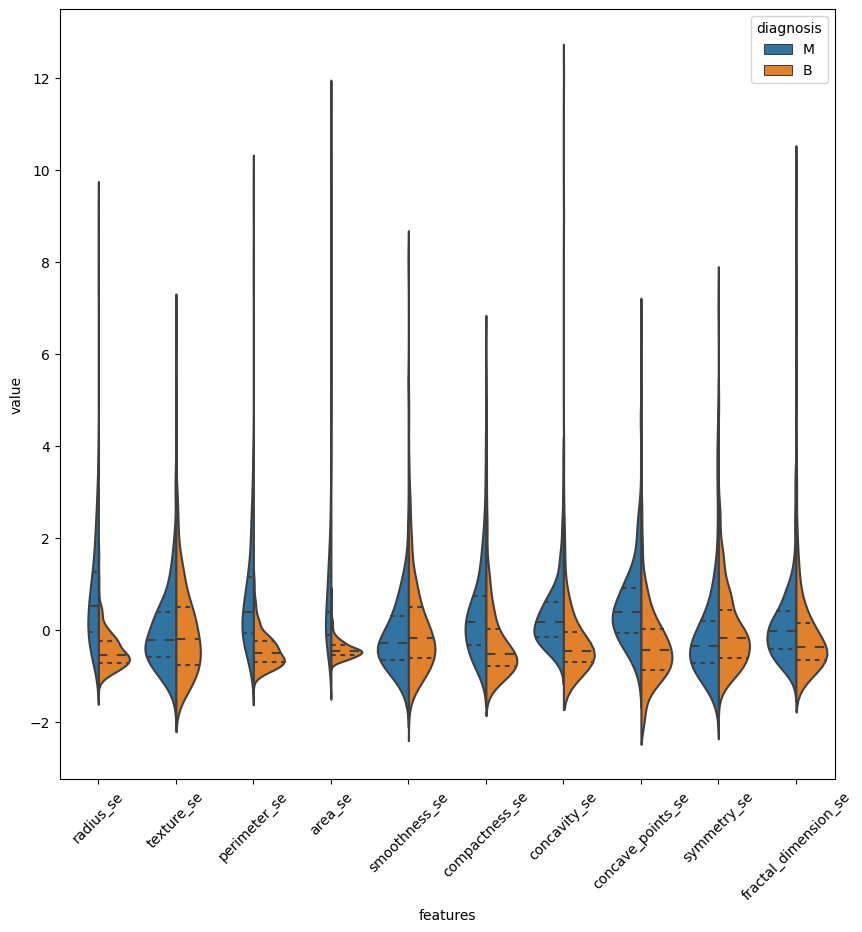

In [14]:
# Second ten features
violin_plot(10,20)
# texture_se and smoothness_se, symmetry_se and fractal_dimension_se has almost the same median for both tumors, hence not good for classification.

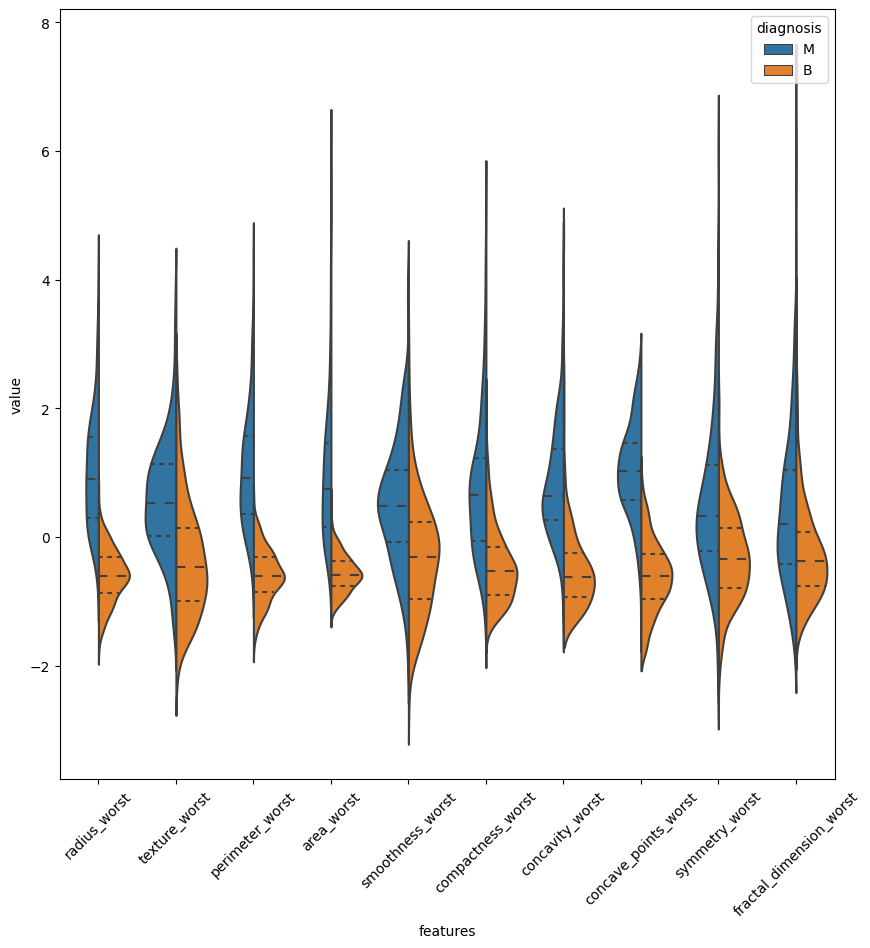

In [15]:
# Third ten features
violin_plot(20,31)
#some similarities between radius_worst and perimeter_worst, and concavity_worst and concave points_worst(violin plots look similar)


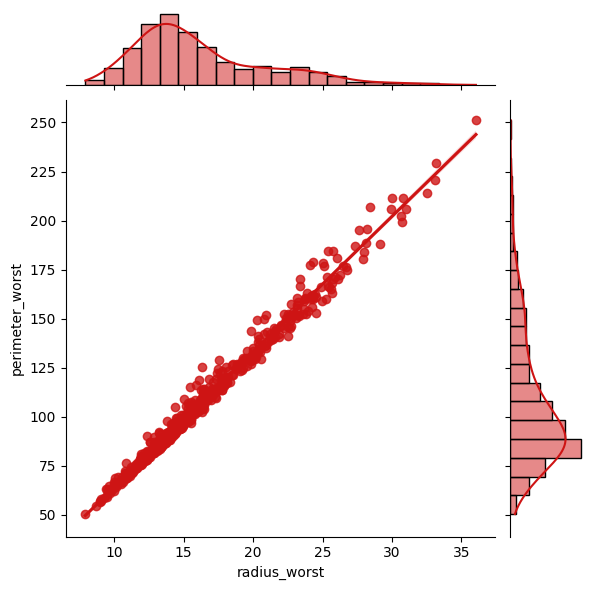

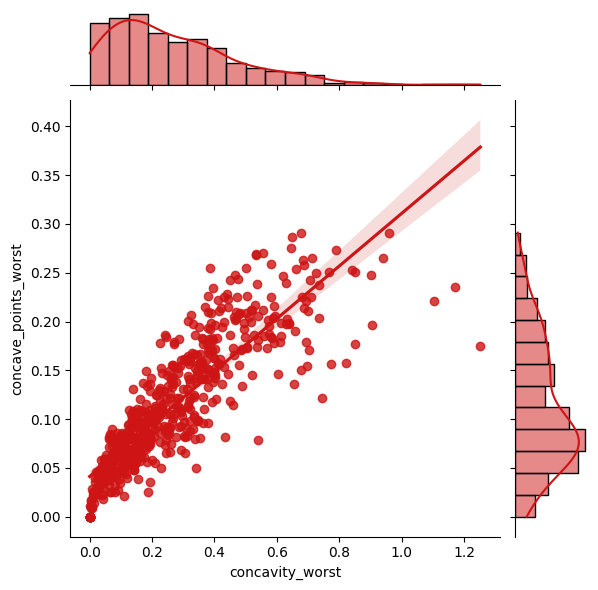

In [16]:
#check for correlation
joint_plot("radius_worst","perimeter_worst")
joint_plot("concavity_worst","concave_points_worst")

#radius_worst and perimeter_worst are strongly correlated, linear relationship between the two features, due to the formula used in calculation.
#Concave points_worst and Concavity_worst also seem correlated.

In [17]:
#Selected Features for classification

#radius_mean,perimeter_mean and area_mean -> choose area_mean
#compactness_mean, concavity_mean and concave_points_mean are correlated -> choose concavity_mean.

#radius_se, perimeter_se and area_se are correlated ->choose area_se.
#compactness_se, concavity_se and concave_points_se are correlated ->choose concavity_se.

#radius_worst, perimeter_worst and area_worst are correlated ->choose area_worst.
#compactness_worst, concavity_worst and concave_points_worst are correlated -> choose concavity_worst.

#drop fractal_dimension_mean
 


In [18]:
#Drop the above features, do not modify x. Create x_1.
drop_1 =['radius_mean','perimeter_mean','compactness_mean','concave_points_mean','fractal_dimension_mean','radius_se','perimeter_se','compactness_se','concave_points_se','radius_worst','perimeter_worst','compactness_worst','concave_points_worst']
x_1=x.drop(drop_1,axis = 1 )
x_1.head(5)

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,texture_worst,area_worst,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,10.38,1001.0,0.11840,0.3001,0.2419,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,17.33,2019.0,0.1622,0.7119,0.4601,0.11890
1,17.77,1326.0,0.08474,0.0869,0.1812,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,23.41,1956.0,0.1238,0.2416,0.2750,0.08902
2,21.25,1203.0,0.10960,0.1974,0.2069,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,25.53,1709.0,0.1444,0.4504,0.3613,0.08758
3,20.38,386.1,0.14250,0.2414,0.2597,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,26.50,567.7,0.2098,0.6869,0.6638,0.17300
4,14.34,1297.0,0.10030,0.1980,0.1809,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,16.67,1575.0,0.1374,0.4000,0.2364,0.07678


<Axes: >

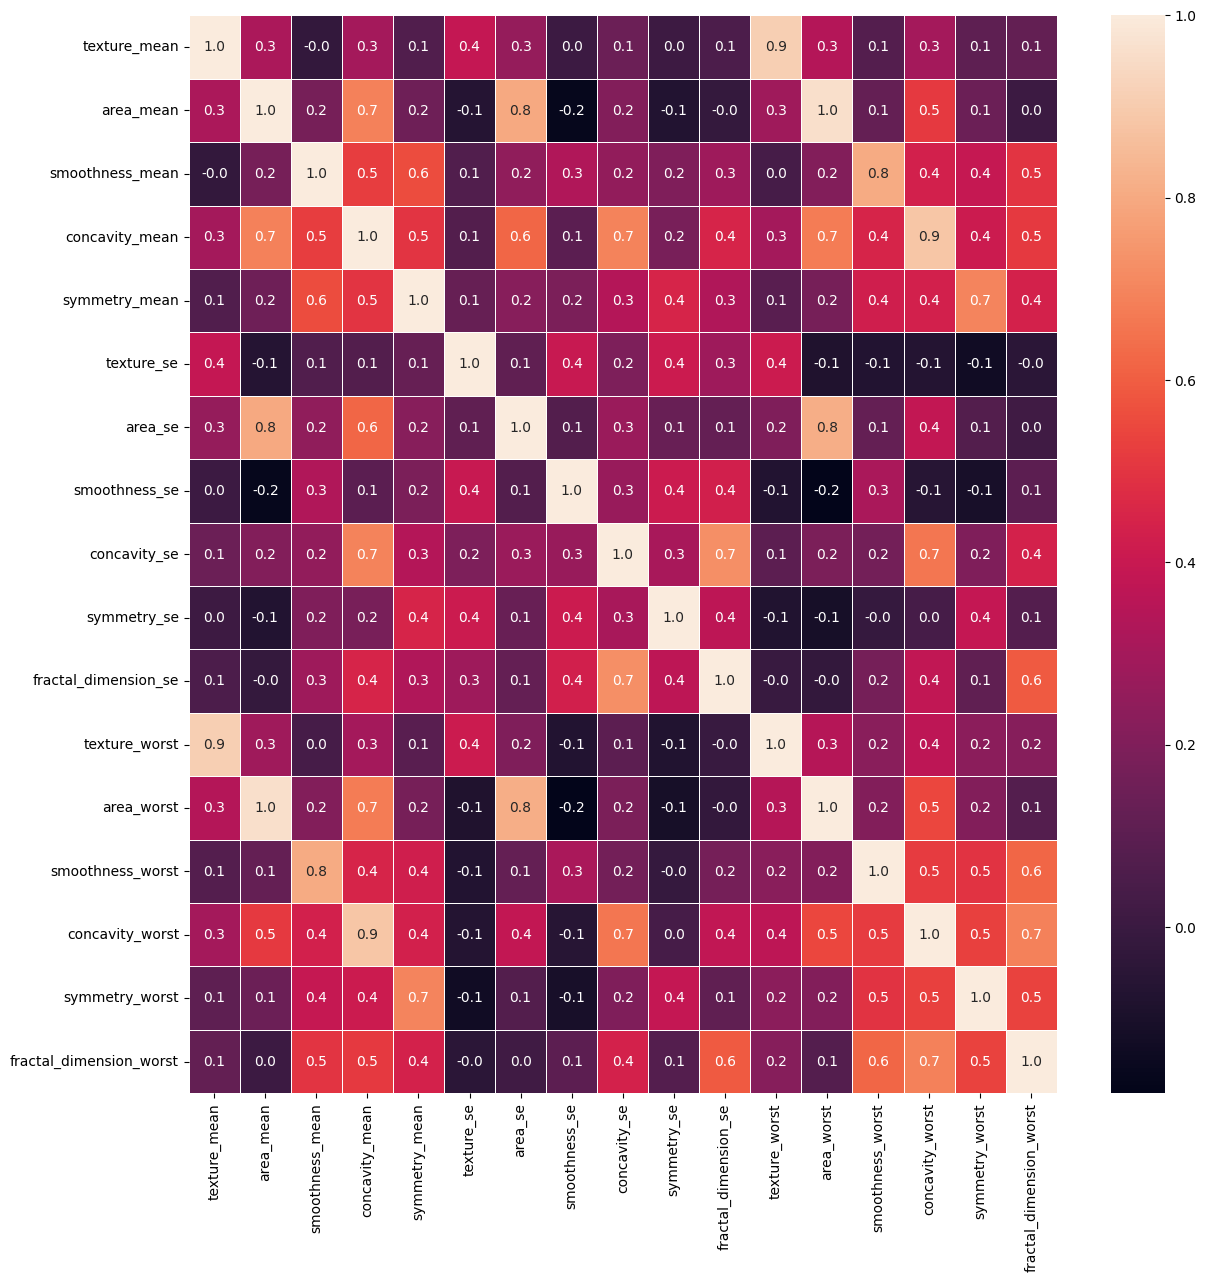

In [19]:
#Correlation map to check correlation among the remaining features
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(x_1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [20]:
# From the heatmap, area_worst and area_mean are highly correlated -> drop area_worst, 
#texture_worst and texture_mean -> drop texture_worst
#concavity_worst and concavity_mean ->drop concavity_worst

In [21]:
drop_2=['area_worst','texture_worst','concavity_worst']
x_2=x_1.drop(drop_2,axis = 1 )
x_2.head(5)

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,symmetry_worst,fractal_dimension_worst
0,10.38,1001.0,0.11840,0.3001,0.2419,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.4601,0.11890
1,17.77,1326.0,0.08474,0.0869,0.1812,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2750,0.08902
2,21.25,1203.0,0.10960,0.1974,0.2069,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.3613,0.08758
3,20.38,386.1,0.14250,0.2414,0.2597,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6638,0.17300
4,14.34,1297.0,0.10030,0.1980,0.1809,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.2364,0.07678


<Axes: >

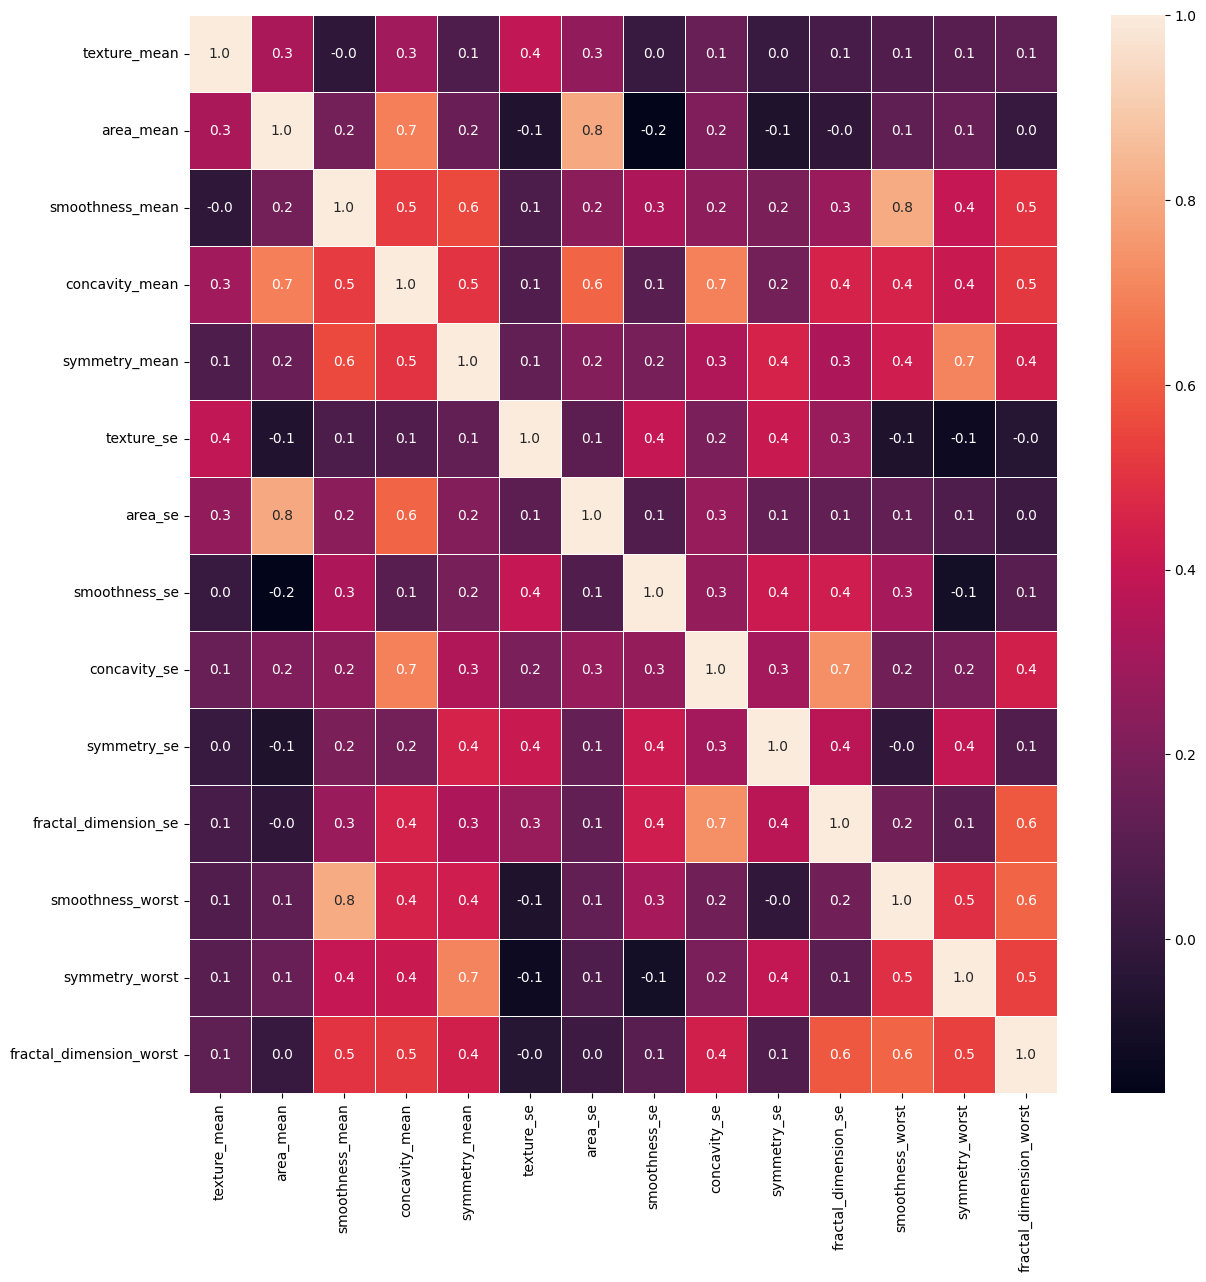

In [22]:
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(x_2.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
#now the features are almost not correlated

In [23]:
#Modelling
# Change target variable to binary format

y = y.replace("B", 0)
y = y.replace("M", 1)

#Split data (train:70%, test:30%)
x_train, x_test, y_train, y_test = train_test_split(x_2, y, test_size=0.3)

#check dimension
print("train_data:",x_train.shape)
print("test_data:",x_test.shape)



train_data: (398, 14)
test_data: (171, 14)


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score

In [25]:
# Change Diagnosis to binary format to calculate F1 score
y = y.replace("B", 0)
y = y.replace("M", 1)

In [26]:
# Random Forest Classification
rf_clf = RandomForestClassifier(random_state=43)  
rf_clf = rf_clf.fit(x_train, y_train)

In [27]:
#Recall, Accuracy, F1 score

recall = recall_score(y_test,rf_clf.predict(x_test))
print('RF Recall is : ', recall)

accuracy = accuracy_score(y_test,rf_clf.predict(x_test))
print('RF Accuracy is : ', accuracy)

f1 = f1_score(y_test,rf_clf.predict(x_test))
print('RF F1 score is : ', f1)



RF Recall is :  0.8490566037735849
RF Accuracy is :  0.9298245614035088
RF F1 score is :  0.8823529411764707


In [28]:
#SVM classifier
svm_clf = svm.SVC()

#Training SVM model on the training set
svm_clf.fit(x_train, y_train)

#Making predictions on the testing set
y_pred_svm = svm_clf.predict(x_test)

#Evaluating the performance of the model using various metrics
accuracy = metrics.accuracy_score(y_test, y_pred_svm)
precision = metrics.precision_score(y_test, y_pred_svm)
recall = metrics.recall_score(y_test, y_pred_svm)
f1_score = metrics.f1_score(y_test, y_pred_svm)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

Accuracy: 0.8830409356725146
Precision: 0.9459459459459459
Recall: 0.660377358490566
F1 Score: 0.7777777777777778


In [29]:
#Logistic Regressin

logreg = LogisticRegression()
logreg.fit(x_train,y_train)

#Making predictions on test data
y_pred_lr = logreg.predict(x_test)

#Model Evaluation
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_lr))
print("Precision:",metrics.precision_score(y_test, y_pred_lr))
print("Recall:",metrics.recall_score(y_test, y_pred_lr))
print("F1 Score:",metrics.f1_score(y_test, y_pred_lr))







Accuracy: 0.8947368421052632
Precision: 0.8571428571428571
Recall: 0.7924528301886793
F1 Score: 0.8235294117647058


/Users/sivagamiaravind/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
#saving the model
import joblib
joblib.dump(rf_clf, r"/Users/sivagamiaravind/breastcancer/rf-model.pkl")

['/Users/sivagamiaravind/breastcancer/rf-model.pkl']